# Erforderliche Bibliotheken laden

In [1]:
import pm4py
import io
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
import os
os.getcwd()

'c:\\Users\\flemm\\OneDrive - NORDAKADEMIE\\01_Master MADS23a\\13_WPM_Process Mining\\code-ha-process-mining'

Konfigurationen für Visualisierungen und weitere Parameter

## Daten laden

In [3]:
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.bpmn import visualizer as bpmn_vis

In [4]:
log_domestic = pm4py.read_xes('Data/DomesticDeclarations.xes')
log_international = pm4py.read_xes('Data/InternationalDeclarations.xes')

parsing log, completed traces ::   0%|          | 0/10500 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/6449 [00:00<?, ?it/s]

Die Daten wurden erfolgreich eingelesen. Es erfolgt zunächst eine explorative Datenanalyse für die _inländischen_ und anschließend für die _ausländischen_ Anträge.

## Domestic Log

### Explorative Datenanalyse

In [5]:
print(f'Für initiale Untersuchungen wird das Domestic-Log zunächst in ein Pandas-Dataframe überführt.')
df_domestic = pm4py.convert_to_dataframe(log_domestic)

Für initiale Untersuchungen wird das Domestic-Log zunächst in ein Pandas-Dataframe überführt.


In [6]:
print(f'Der Domestic-Datensatz weist die folgende Menge an Zeilen und Spalten auf: {df_domestic.shape}')

Der Domestic-Datensatz weist die folgende Menge an Zeilen und Spalten auf: (56437, 10)


Wir sehen uns den Domestic-Datensatz als Tabelle an, um ein erstes Gefühl für die Daten zu erhalten.

In [7]:
print(f'\n Um ein erstes Gefühl für die Daten zu erhalten, werden die ersten und letzten Zeilen des Domestic-Dataframes ausgegeben:')
display(df_domestic)


 Um ein erstes Gefühl für die Daten zu erhalten, werden die ersten und letzten Zeilen des Domestic-Dataframes ausgegeben:


id  org:resource  \
0               st_step 86794_0  STAFF MEMBER   
1               st_step 86793_0  STAFF MEMBER   
2       dd_declaration 86791_19        SYSTEM   
3       dd_declaration 86791_20        SYSTEM   
4               st_step 86798_0  STAFF MEMBER   
...                         ...           ...   
56432          st_step 138363_0  STAFF MEMBER   
56433          st_step 138361_0  STAFF MEMBER   
56434          st_step 138362_0  STAFF MEMBER   
56435  dd_declaration 138359_19        SYSTEM   
56436  dd_declaration 138359_20        SYSTEM   

                                   concept:name            time:timestamp  \
0             Declaration SUBMITTED by EMPLOYEE 2017-01-09 09:49:50+00:00   
1      Declaration FINAL_APPROVED by SUPERVISOR 2017-01-09 11:27:48+00:00   
2                               Request Payment 2017-01-10 09:34:44+00:00   
3                               Payment Handled 2017-01-12 17:31:22+00:00   
4             Declaration SUBMITTED by EMPLOYEE 2017-01-09 10:26:14+00:00   
...                                         ...                       ...   
56432         Declaration SUBMITTED by EMPLOYEE 2018-12-29 17:50:14+00:00   
56433    Declaration APPROVED by ADMINISTRATION 2018-12-29 17:56:13+00:00   
56434  Declaration FINAL_APPROVED by SUPERVISOR 2019-01-03 08:55:52+00:00   
56435                           Request Payment 2019-01-08 08:20:28+00:00   
56436                           Payment Handled 2019-01-10 17:31:08+00:00   

             org:role             case:id   case:concept:name  \
0            EMPLOYEE   declaration 86791   declaration 86791   
1          SUPERVISOR   declaration 86791   declaration 86791   
2           UNDEFINED   declaration 86791   declaration 86791   
3           UNDEFINED   declaration 86791   declaration 86791   
4            EMPLOYEE   declaration 86795   declaration 86795   
...               ...                 ...                 ...   
56432        EMPLOYEE  declaration 138359  declaration 138359   
56433  ADMINISTRATION  declaration 138359  declaration 138359   
56434      SUPERVISOR  declaration 138359  declaration 138359   
56435       UNDEFINED  declaration 138359  declaration 138359   
56436       UNDEFINED  declaration 138359  declaration 138359   

      case:BudgetNumber     case:DeclarationNumber  case:Amount  
0          budget 86566   declaration number 86792    26.851205  
1          budget 86566   declaration number 86792    26.851205  
2          budget 86566   declaration number 86792    26.851205  
3          budget 86566   declaration number 86792    26.851205  
4          budget 86566   declaration number 86796   182.464172  
...                 ...                        ...          ...  
56432      budget 86566  declaration number 138360   190.404576  
56433      budget 86566  declaration number 138360   190.404576  
56434      budget 86566  declaration number 138360   190.404576  
56435      budget 86566  declaration number 138360   190.404576  
56436      budget 86566  declaration number 138360   190.404576  

[56437 rows x 10 columns]

Welche Datentypen gibt es und sind NULL-Werte vorhanden?

In [8]:
print(df_domestic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56437 entries, 0 to 56436
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   id                      56437 non-null  object             
 1   org:resource            56437 non-null  object             
 2   concept:name            56437 non-null  object             
 3   time:timestamp          56437 non-null  datetime64[ns, UTC]
 4   org:role                56437 non-null  object             
 5   case:id                 56437 non-null  object             
 6   case:concept:name       56437 non-null  object             
 7   case:BudgetNumber       56437 non-null  object             
 8   case:DeclarationNumber  56437 non-null  object             
 9   case:Amount             56437 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(8)
memory usage: 4.3+ MB
None


Das inländische Log enthält keine NULL-Werte.

Wie viele verschiedene Aktivitäten gibt es im Log und wie heißen sie?

In [9]:
print(df_domestic["concept:name"].unique())
print(f'\n Es gibt im Domestic-Datensatz insgesamt {len(df_domestic["concept:name"].unique())} verschiedene Aktivitäten.')

['Declaration SUBMITTED by EMPLOYEE'
 'Declaration FINAL_APPROVED by SUPERVISOR' 'Request Payment'
 'Payment Handled' 'Declaration APPROVED by PRE_APPROVER'
 'Declaration REJECTED by MISSING' 'Declaration REJECTED by PRE_APPROVER'
 'Declaration REJECTED by EMPLOYEE' 'Declaration SAVED by EMPLOYEE'
 'Declaration REJECTED by SUPERVISOR'
 'Declaration APPROVED by ADMINISTRATION'
 'Declaration APPROVED by BUDGET OWNER'
 'Declaration FOR_APPROVAL by SUPERVISOR'
 'Declaration REJECTED by ADMINISTRATION'
 'Declaration FOR_APPROVAL by PRE_APPROVER'
 'Declaration REJECTED by BUDGET OWNER'
 'Declaration FOR_APPROVAL by ADMINISTRATION']

 Es gibt im Domestic-Datensatz insgesamt 17 verschiedene Aktivitäten.


In [10]:
print('Die nachfolgende Liste gibt an, wie oft welche Aktivität im Domestic-Datensatz vorhanden ist: \n')

event_frequencies_domestic = df_domestic["concept:name"].value_counts()

print(event_frequencies_domestic)

Die nachfolgende Liste gibt an, wie oft welche Aktivität im Domestic-Datensatz vorhanden ist: 

concept:name
Declaration SUBMITTED by EMPLOYEE             11531
Declaration FINAL_APPROVED by SUPERVISOR      10131
Payment Handled                               10044
Request Payment                               10040
Declaration APPROVED by ADMINISTRATION         8202
Declaration APPROVED by BUDGET OWNER           2820
Declaration REJECTED by EMPLOYEE               1365
Declaration REJECTED by ADMINISTRATION          952
Declaration APPROVED by PRE_APPROVER            685
Declaration REJECTED by SUPERVISOR              293
Declaration SAVED by EMPLOYEE                   135
Declaration REJECTED by MISSING                  91
Declaration REJECTED by PRE_APPROVER             86
Declaration REJECTED by BUDGET OWNER             59
Declaration FOR_APPROVAL by SUPERVISOR            1
Declaration FOR_APPROVAL by PRE_APPROVER          1
Declaration FOR_APPROVAL by ADMINISTRATION        1
Name: c


 Für die Liste der Häufigkeiten der durchgeführten Aktivitäten wird nachfolgend zur besseren Übersicht und Einordnung eine Visualisierung ausgegeben: 



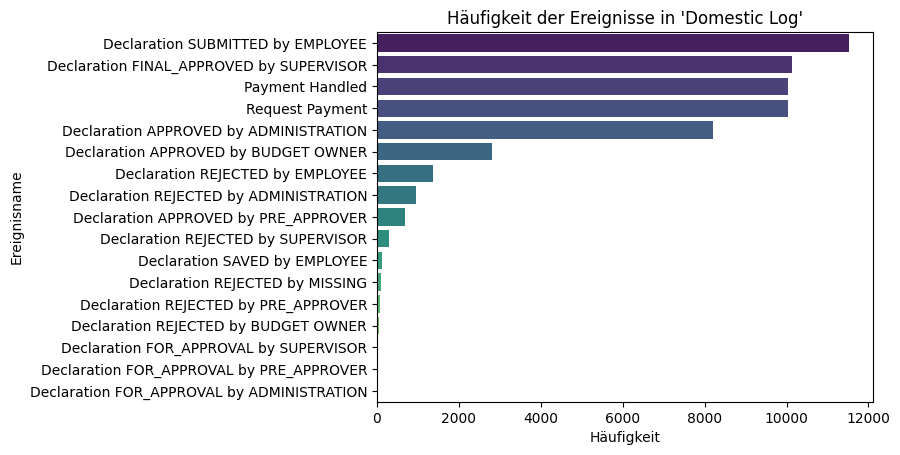

Die absoluten Häufigkeiten der durchgeführten Aktivitäten unterscheiden sich deutlich.


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from src.settings import SettingsSeaborn
import warnings

print('\n Für die Liste der Häufigkeiten der durchgeführten Aktivitäten wird nachfolgend zur besseren Übersicht und Einordnung eine Visualisierung ausgegeben: \n')


# Warnungen unterdrücken, um den Output übersichtlich zu halten:
warnings.filterwarnings("ignore", category=FutureWarning)

# Visualisierung erzeugen
sns.barplot(x=event_frequencies_domestic.values, y=event_frequencies_domestic.index, palette=SettingsSeaborn.PALETTE.value)

# Labels und Titel einfügen
plt.xlabel("Häufigkeit")
plt.ylabel("Ereignisname")
plt.title("Häufigkeit der Ereignisse in 'Domestic Log'")
plt.show()

print('Die absoluten Häufigkeiten der durchgeführten Aktivitäten unterscheiden sich deutlich.')

Was sind die Start- und Endaktivitäten für **Domestic**?

In [12]:
startactivitities_log_domestic = pm4py.get_start_activities(log_domestic)
startactivitities_log_domestic

{'Declaration SUBMITTED by EMPLOYEE': 10365,
 'Declaration SAVED by EMPLOYEE': 135}

In [13]:
print(f'Es gibt im Domestic-Datensatz {len(startactivitities_log_domestic)} unterschiedliche Startaktivitäten.')

Es gibt im Domestic-Datensatz 2 unterschiedliche Startaktivitäten.


In [14]:
total_cases_startactivitities_log_domestic = sum(startactivitities_log_domestic.values())
print(f'Es gibt im Domestic-Datensatz insgesamt {(total_cases_startactivitities_log_domestic)} Prozessinstanzen.')

Es gibt im Domestic-Datensatz insgesamt 10500 Prozessinstanzen.


In [15]:
endactivities_log_domestic = pm4py.get_end_activities(log_domestic)
print(f'Es gibt im Domestic-Datensatz {len(endactivities_log_domestic)} unterschiedliche Endaktivitäten.')
print('Diese Endaktivitäten und ihre Häufigkeiten sind nachfolgend aufgeführt:')
endactivities_log_domestic

Es gibt im Domestic-Datensatz 6 unterschiedliche Endaktivitäten.
Diese Endaktivitäten und ihre Häufigkeiten sind nachfolgend aufgeführt:


{'Payment Handled': 10043,
 'Declaration SAVED by EMPLOYEE': 134,
 'Declaration REJECTED by MISSING': 30,
 'Declaration REJECTED by EMPLOYEE': 284,
 'Declaration REJECTED by ADMINISTRATION': 5,
 'Declaration REJECTED by SUPERVISOR': 4}

**Begutachtung des gesamten Logs mit dem Alpha Miner**

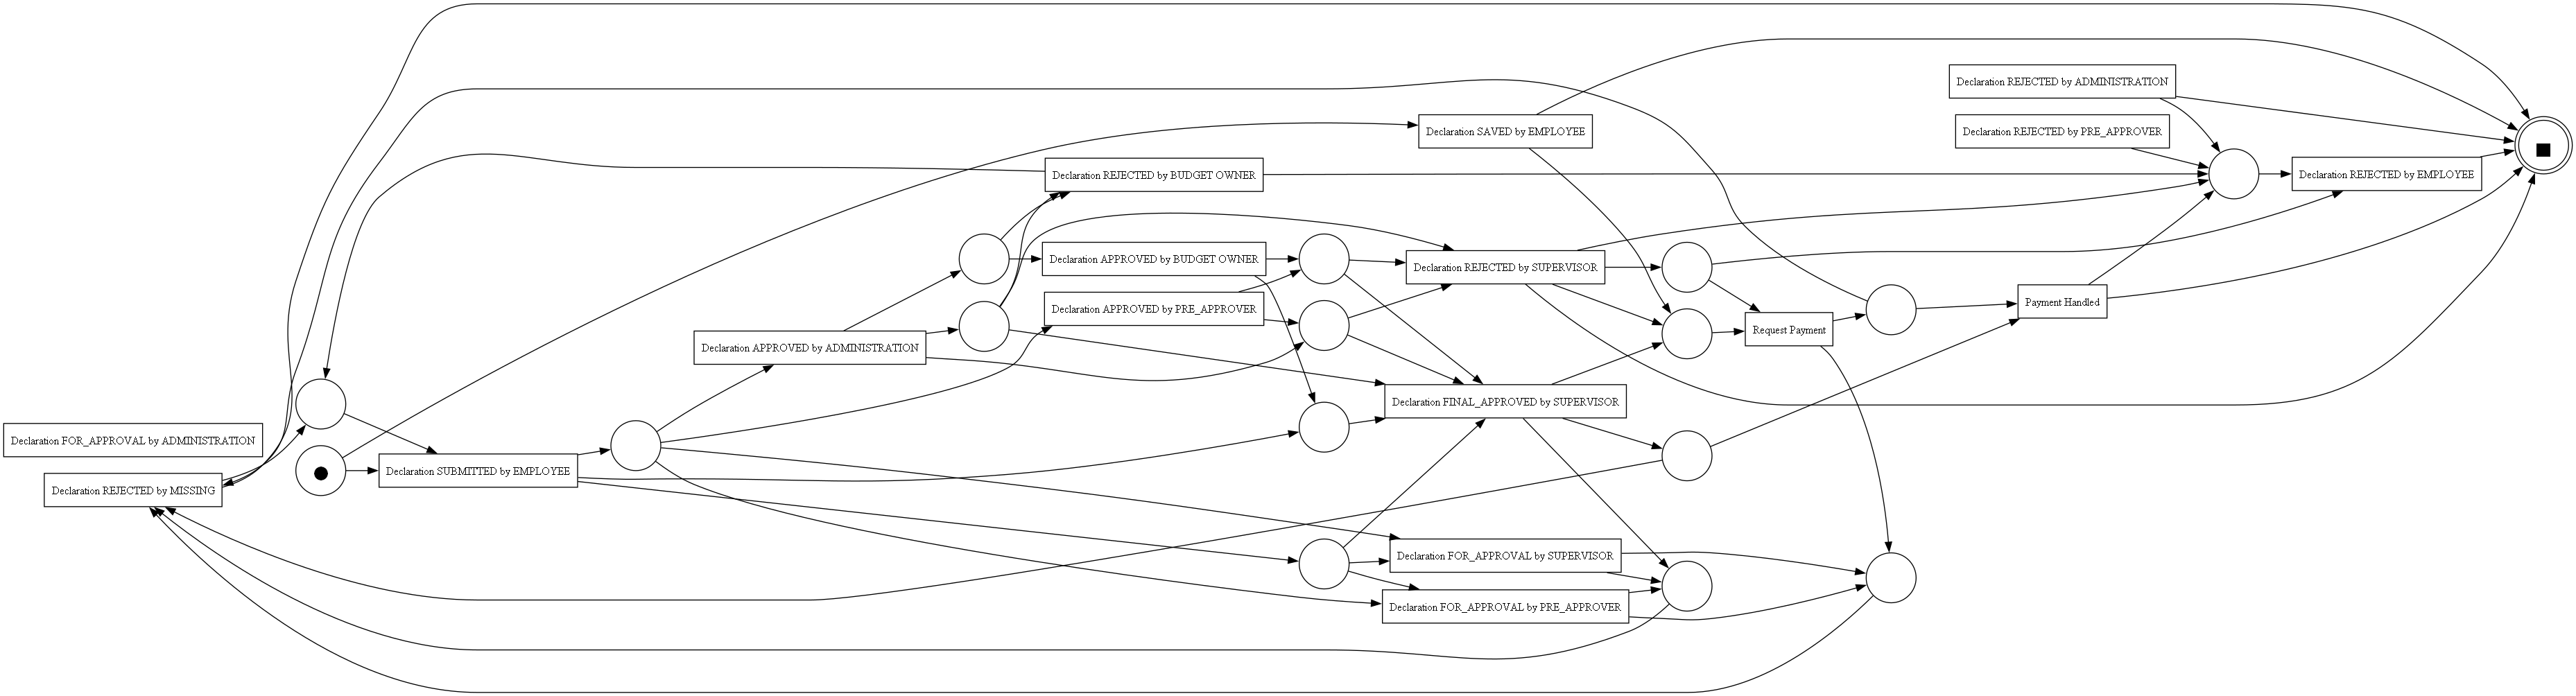

In [16]:
net, initial_marking, final_marking = alpha_miner.apply(log_domestic)

gviz_alphaminer_domestic = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz_alphaminer_domestic)

Für eine weitere Komplexitätsreduktion werden nachfolgend verschiedene Prozessvarianten betrachtet, um eine geeignete Abstraktionsebene zur Beantwortung der Ausgangsfrage zu finden.

### Prozessvarianten

In [17]:
from pm4py.algo.filtering.log.variants import variants_filter

# Extrahiere die Varianten aus dem Log
variants_domestic = variants_filter.get_variants(log_domestic)

# Zeige die Varianten an
for variant_id, variant in variants_domestic.items():
    print(f"Variante: {variant_id}")
    print(f"Anzahl der Fälle: {len(variant)}")
    print("Aktivitäten-Sequenz:")
    for event in variant[0]:
        print(f" - {event['concept:name']} (Ressource: {event['org:resource']})")
    print("-" * 40)


Variante: ('Declaration SUBMITTED by EMPLOYEE', 'Declaration FINAL_APPROVED by SUPERVISOR', 'Request Payment', 'Payment Handled')
Anzahl der Fälle: 1392
Aktivitäten-Sequenz:
 - Declaration SUBMITTED by EMPLOYEE (Ressource: STAFF MEMBER)
 - Declaration FINAL_APPROVED by SUPERVISOR (Ressource: STAFF MEMBER)
 - Request Payment (Ressource: SYSTEM)
 - Payment Handled (Ressource: SYSTEM)
----------------------------------------
Variante: ('Declaration SUBMITTED by EMPLOYEE', 'Declaration APPROVED by PRE_APPROVER', 'Declaration FINAL_APPROVED by SUPERVISOR', 'Request Payment', 'Payment Handled')
Anzahl der Fälle: 575
Aktivitäten-Sequenz:
 - Declaration SUBMITTED by EMPLOYEE (Ressource: STAFF MEMBER)
 - Declaration APPROVED by PRE_APPROVER (Ressource: STAFF MEMBER)
 - Declaration FINAL_APPROVED by SUPERVISOR (Ressource: STAFF MEMBER)
 - Request Payment (Ressource: SYSTEM)
 - Payment Handled (Ressource: SYSTEM)
----------------------------------------
Variante: ('Declaration SUBMITTED by EMPLOY

In [18]:
print(f'Es gibt im log_domestic insgesamt {len(variants_domestic)} verschiedene Varianten.')

Es gibt im log_domestic insgesamt 99 verschiedene Varianten.


**BPMN für die alle 99 Varianten**

Die BPMN-Grafik ist vergleichsweise unübersichtlich und sollte für eine bessere Übersichtlichkeit simplifiziert werden. Der Inducive-Miner-Algorithmus liefert häufig Ergebnisse mit einer höheren Praxisrelevanz als der Alpha-Miner-Algorithmus.

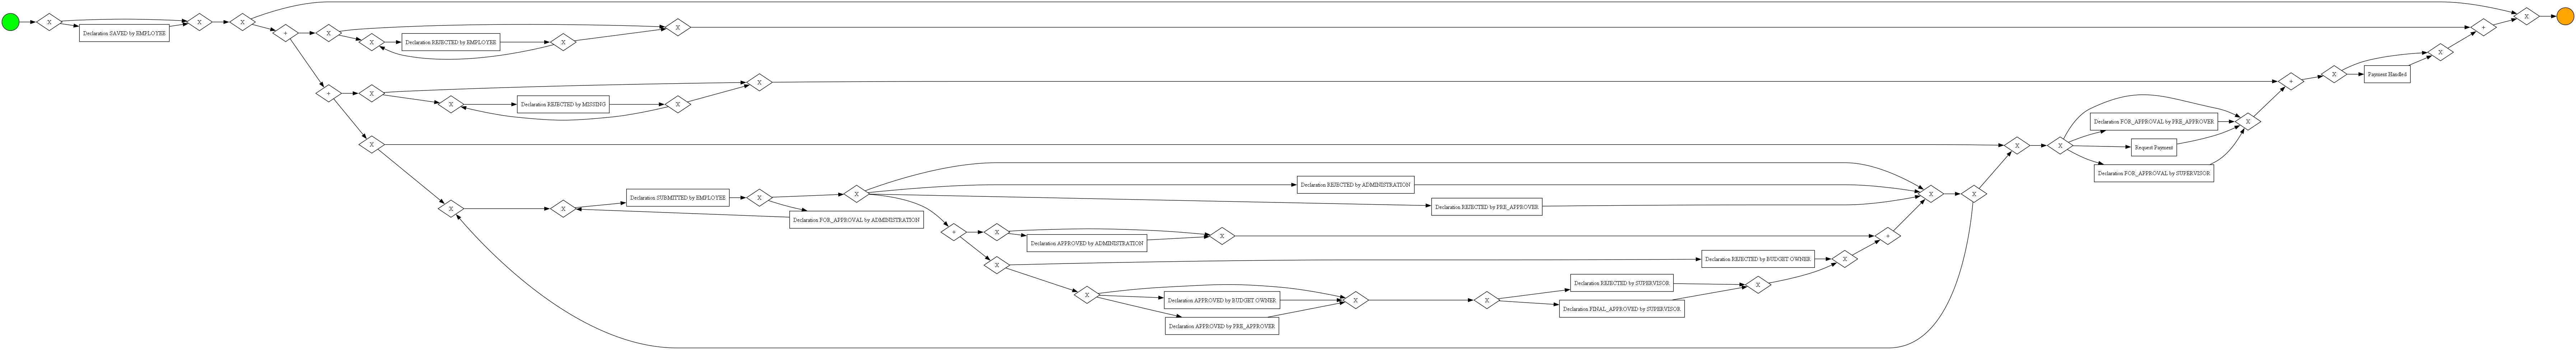

In [19]:
from pm4py.visualization.bpmn import visualizer as bpmn_vis

bpmn_model_domestic = pm4py.discover_bpmn_inductive(
    log_domestic,
    # noise_threshold = noise_threshold
)

gviz_bpmn_domestic = bpmn_vis.apply(bpmn_model_domestic)
bpmn_vis.view(gviz_bpmn_domestic)

Die mithilfe des Inductive-Miner-Algorithmus erzeugte BPMN-Grafik ist übersichtlicher und besser geeignet als das mit dem Alpha-Miner-Algorithmus erzeugte Petri-Netz. Nachfolgend wird die Komplexität weiter durch die Einschränkungen von Vairanten reduziert.

In [20]:
from IPython.display import display, Markdown

from pm4py.statistics.traces.generic.log import case_statistics
import ipywidgets as widgets

class VariantFilter:
    def __init__(self, log, initial_percentage=94):
        self.log = log

        self.case_statistics = case_statistics.get_variant_statistics(log)
        self.case_statistics = sorted(self.case_statistics, key=lambda x: x['count'], reverse=True)
        self.total_traces = sum([variant['count'] for variant in self.case_statistics])
        self.filtered_variants = []
        
        self.slider_percentage_nonanomaly_domestic = widgets.IntSlider(
            value=initial_percentage,
            min=0,
            max=100,
            step=1,
            readout=True
        )
        
        widgets.interact(self.update_variants_table, 
                         percentage_nonanomaly_domestic=self.slider_percentage_nonanomaly_domestic)

    def update_variants_table(self, percentage_nonanomaly_domestic):
        self.filtered_variants = []
        
        kumulative_summe = 0
        variants_nonanomaly_domestic = []

        for variant in self.case_statistics:
            count = variant['count']
            prozentsatz = (count / self.total_traces) * 100
            kumulative_summe += prozentsatz
            self.filtered_variants.append(variant["variant"])

            variants_nonanomaly_domestic.append(
                f'|{count}|{prozentsatz:.2f}%|{kumulative_summe:.2f}%|{" --> ".join(variant["variant"])}|')

            if kumulative_summe > percentage_nonanomaly_domestic:
                break

        table_header = "|Anzahl|Relativer Anteil|Kumulierter rel. Anteil|Variante|\n|-------|-------|-------|-------|"
        table_data = '\n'.join(variants_nonanomaly_domestic)
        display(Markdown(f'{table_header}\n{table_data}'))

domestic_variant_filter = VariantFilter(log_domestic)

interactive(children=(IntSlider(value=94, description='percentage_nonanomaly_domestic'), Output()), _dom_class…

Es werden nachfolgend nur Varianten betrachtet, deren relative Häufigkeit >1% ist. Auf diese Weise ergibt sich ein Log mit einem kumulierten relativen Anteil von 94% aller Ausgangsvarianten. Diese Einschränkung verspricht die für die Beantwortung der Ausgangsfrage benötigte Abstraktionsebene.

In [21]:
log_domestic_nonanomaly = variants_filter.apply(log_domestic, domestic_variant_filter.filtered_variants)

Das neu erzeugte Log für den Zugriff aus anderen Notebooks wegspeichern.

In [22]:
pm4py.write_xes(log_domestic_nonanomaly, 'Data/nonanomaly_DomesticDeclarations.xes')

exporting log, completed traces ::   0%|          | 0/9899 [00:00<?, ?it/s]

**BPMN anwenden auf die Top % (nonanomaly)**

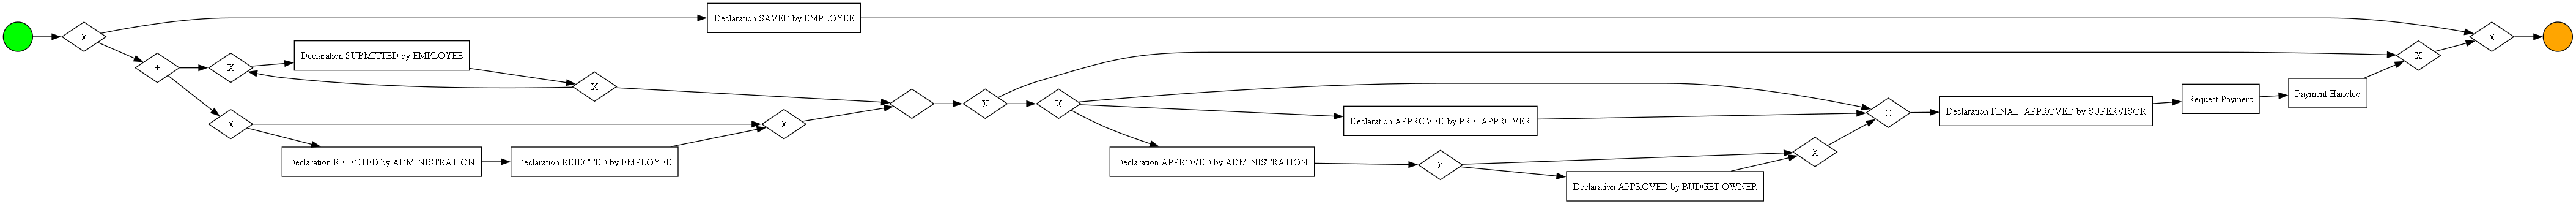

''

In [23]:
from pm4py.visualization.bpmn import visualizer as bpmn_vis

log_domestic_nonanomaly = variants_filter.apply(log_domestic, domestic_variant_filter.filtered_variants)

bpmn_model_domestic_nonanomaly = pm4py.discover_bpmn_inductive(
    log_domestic_nonanomaly,
    # noise_threshold = noise_threshold
)

gviz_bpmn_domestic_nonanomaly = bpmn_vis.apply(bpmn_model_domestic_nonanomaly)
bpmn_vis.view(gviz_bpmn_domestic_nonanomaly)


output_path = "./Data/gviz_bpmn_domestic_nonanomaly.svg"


bpmn_vis.save(gviz_bpmn_domestic_nonanomaly, output_path)

## International Log

### Explorative Datenanalyse

Die bereits für das Log mit den inländischen Anträgen durchgeführten Schritte der Explorativen Datenanalyse werden auf das Log der ausländischen Anträge angewendet.

In [24]:
# Domestic log in ein pandas DataFrame überführen
df_international = pm4py.convert_to_dataframe(log_international)

In [25]:
print(df_domestic.shape)

(56437, 11)


In [26]:
display(df_international)

id  org:resource  \
0      rv_travel permit 76455_6  STAFF MEMBER   
1      rv_travel permit 76455_7  STAFF MEMBER   
2               st_step 76459_0  STAFF MEMBER   
3               st_step 76460_0  STAFF MEMBER   
4               st_step 76461_0  STAFF MEMBER   
...                         ...           ...   
72146           st_step 13239_0  STAFF MEMBER   
72147           st_step 13241_0  STAFF MEMBER   
72148           st_step 13240_0  STAFF MEMBER   
72149  rv_travel permit 13226_6  STAFF MEMBER   
72150  rv_travel permit 13226_7  STAFF MEMBER   

                                 concept:name            time:timestamp  \
0                                  Start trip 2016-10-05 00:00:00+00:00   
1                                    End trip 2016-10-05 00:00:00+00:00   
2                Permit SUBMITTED by EMPLOYEE 2017-04-06 13:32:10+00:00   
3         Permit FINAL_APPROVED by SUPERVISOR 2017-04-06 13:32:28+00:00   
4           Declaration SUBMITTED by EMPLOYEE 2017-04-07 13:38:14+00:00   
...                                       ...                       ...   
72146       Declaration SUBMITTED by EMPLOYEE 2018-12-18 15:06:50+00:00   
72147  Declaration REJECTED by ADMINISTRATION 2018-12-18 15:06:57+00:00   
72148        Declaration REJECTED by EMPLOYEE 2018-12-19 14:05:36+00:00   
72149                              Start trip 2019-02-19 00:00:00+00:00   
72150                                End trip 2019-02-24 00:00:00+00:00   

             org:role case:Permit travel permit number  \
0            EMPLOYEE       travel permit number 76456   
1            EMPLOYEE       travel permit number 76456   
2            EMPLOYEE       travel permit number 76456   
3          SUPERVISOR       travel permit number 76456   
4            EMPLOYEE       travel permit number 76456   
...               ...                              ...   
72146        EMPLOYEE       travel permit number 13227   
72147  ADMINISTRATION       travel permit number 13227   
72148        EMPLOYEE       travel permit number 13227   
72149        EMPLOYEE       travel permit number 13227   
72150        EMPLOYEE       travel permit number 13227   

         case:DeclarationNumber  case:Amount  case:RequestedAmount  \
0      declaration number 76458    39.664561             39.664561   
1      declaration number 76458    39.664561             39.664561   
2      declaration number 76458    39.664561             39.664561   
3      declaration number 76458    39.664561             39.664561   
4      declaration number 76458    39.664561             39.664561   
...                         ...          ...                   ...   
72146                   UNKNOWN     0.000000              0.000000   
72147                   UNKNOWN     0.000000              0.000000   
72148                   UNKNOWN     0.000000              0.000000   
72149                   UNKNOWN     0.000000              0.000000   
72150                   UNKNOWN     0.000000              0.000000   

      case:Permit TaskNumber  ...  case:concept:name  \
0                    UNKNOWN  ...  declaration 76457   
1                    UNKNOWN  ...  declaration 76457   
2                    UNKNOWN  ...  declaration 76457   
3                    UNKNOWN  ...  declaration 76457   
4                    UNKNOWN  ...  declaration 76457   
...                      ...  ...                ...   
72146               task 427  ...  declaration 13232   
72147               task 427  ...  declaration 13232   
72148               task 427  ...  declaration 13232   
72149               task 427  ...  declaration 13232   
72150               task 427  ...  declaration 13232   

       case:Permit OrganizationalEntity   case:travel permit number  \
0             organizational unit 65458  travel permit number 76456   
1             organizational unit 65458  travel permit number 76456   
2             organizational unit 65458  travel permit number 76456   
3             organizational unit 65458  tra

In [27]:
print(df_international.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72151 entries, 0 to 72150
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype              
---  ------                            --------------  -----              
 0   id                                72151 non-null  object             
 1   org:resource                      72151 non-null  object             
 2   concept:name                      72151 non-null  object             
 3   time:timestamp                    72151 non-null  datetime64[ns, UTC]
 4   org:role                          72151 non-null  object             
 5   case:Permit travel permit number  72151 non-null  object             
 6   case:DeclarationNumber            72151 non-null  object             
 7   case:Amount                       72151 non-null  float64            
 8   case:RequestedAmount              72151 non-null  float64            
 9   case:Permit TaskNumber            72151 non-null  object     

Auch bei den internationalen Anträgen sind keine NULL-Werte vorhanden.

In [28]:
print(f'Im Log für die internationalen Anträge gibt es insgesamt {len(df_international["concept:name"].unique())} verschiedene Aktivitäten, diese lauten:\n')
print(df_international["concept:name"].unique())

Im Log für die internationalen Anträge gibt es insgesamt 34 verschiedene Aktivitäten, diese lauten:



['Start trip' 'End trip' 'Permit SUBMITTED by EMPLOYEE'
 'Permit FINAL_APPROVED by SUPERVISOR' 'Declaration SUBMITTED by EMPLOYEE'
 'Declaration FINAL_APPROVED by SUPERVISOR' 'Request Payment'
 'Payment Handled' 'Permit APPROVED by SUPERVISOR'
 'Permit FINAL_APPROVED by DIRECTOR'
 'Declaration APPROVED by PRE_APPROVER'
 'Declaration APPROVED by ADMINISTRATION'
 'Permit APPROVED by PRE_APPROVER' 'Declaration REJECTED by PRE_APPROVER'
 'Declaration REJECTED by EMPLOYEE' 'Declaration SAVED by EMPLOYEE'
 'Declaration REJECTED by MISSING' 'Permit REJECTED by MISSING'
 'Declaration REJECTED by SUPERVISOR' 'Declaration APPROVED by SUPERVISOR'
 'Declaration FINAL_APPROVED by DIRECTOR'
 'Permit REJECTED by PRE_APPROVER' 'Permit REJECTED by EMPLOYEE'
 'Declaration REJECTED by DIRECTOR' 'Permit REJECTED by SUPERVISOR'
 'Permit APPROVED by ADMINISTRATION' 'Send Reminder'
 'Declaration APPROVED by BUDGET OWNER'
 'Declaration REJECTED by ADMINISTRATION'
 'Permit APPROVED by BUDGET OWNER' 'Permit REJ

Wie häufig kommt welches Event vor im Log für 'international'?

In [29]:
event_frequencies_international = df_international["concept:name"].value_counts()

print(event_frequencies_international)

concept:name
Declaration SUBMITTED by EMPLOYEE           8099
Start trip                                  6449
End trip                                    6449
Permit SUBMITTED by EMPLOYEE                6255
Payment Handled                             6187
Request Payment                             6183
Declaration FINAL_APPROVED by SUPERVISOR    6039
Permit FINAL_APPROVED by SUPERVISOR         5381
Declaration APPROVED by ADMINISTRATION      5037
Permit APPROVED by ADMINISTRATION           4839
Declaration APPROVED by BUDGET OWNER        1834
Declaration REJECTED by EMPLOYEE            1780
Permit APPROVED by BUDGET OWNER             1763
Declaration REJECTED by ADMINISTRATION      1549
Permit APPROVED by SUPERVISOR                641
Permit FINAL_APPROVED by DIRECTOR            640
Declaration APPROVED by PRE_APPROVER         612
Permit APPROVED by PRE_APPROVER              534
Send Reminder                                434
Declaration APPROVED by SUPERVISOR           256
Declara

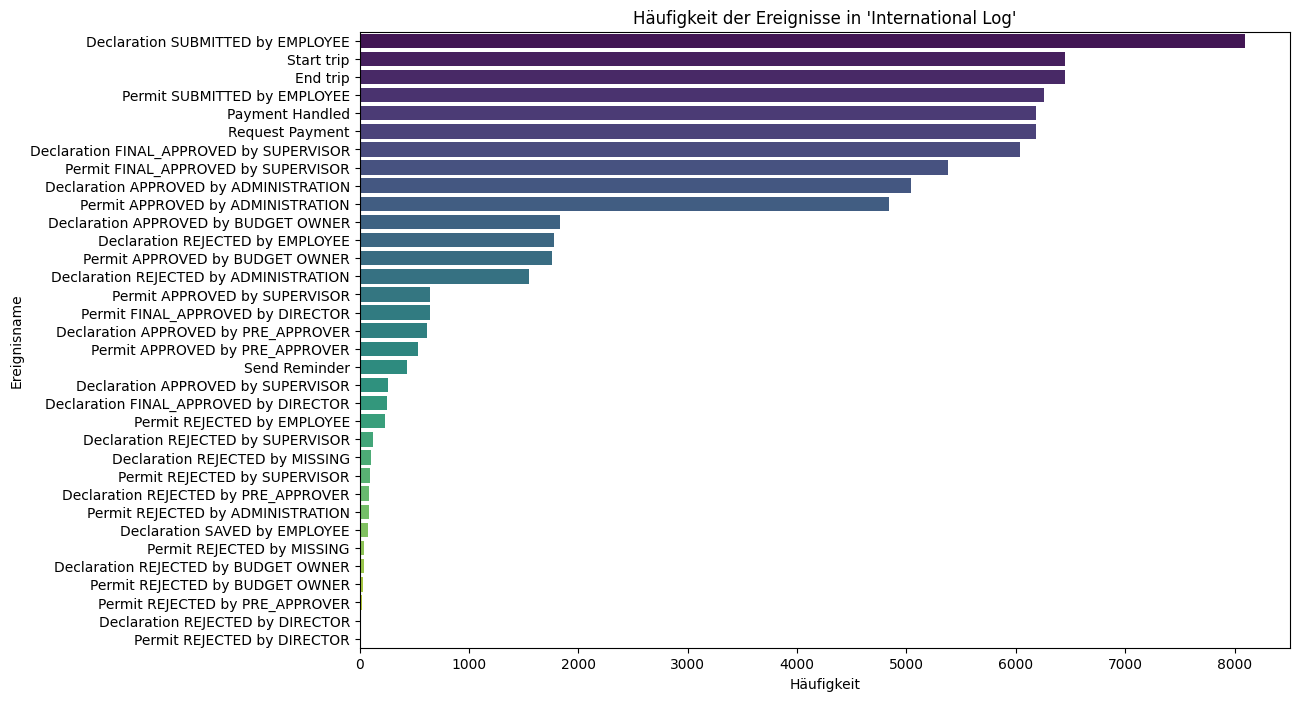

In [30]:
plt.figure(figsize=(12, 8))

# Create the bar plot
sns.barplot(x=event_frequencies_international.values, y=event_frequencies_international.index, palette="viridis")

# Add labels and title
plt.xlabel("Häufigkeit")
plt.ylabel("Ereignisname")
plt.title("Häufigkeit der Ereignisse in 'International Log'")
plt.show()

Start- und Enderergnisse im international Log

In [31]:
startactivitities_log_international = pm4py.get_start_activities(log_international)
startactivitities_log_international

{'Start trip': 740,
 'Declaration SUBMITTED by EMPLOYEE': 407,
 'Permit SUBMITTED by EMPLOYEE': 5294,
 'Declaration SAVED by EMPLOYEE': 8}

In [32]:
endactivitities_log_international = pm4py.get_end_activities(log_international)
endactivitities_log_international

{'Payment Handled': 5646,
 'End trip': 593,
 'Declaration SAVED by EMPLOYEE': 54,
 'Permit REJECTED by MISSING': 8,
 'Declaration REJECTED by MISSING': 11,
 'Declaration REJECTED by EMPLOYEE': 130,
 'Declaration FINAL_APPROVED by SUPERVISOR': 1,
 'Send Reminder': 2,
 'Request Payment': 3,
 'Declaration REJECTED by SUPERVISOR': 1}

**Begutachtung des gesamten Log international mit dem Alpha Miner**

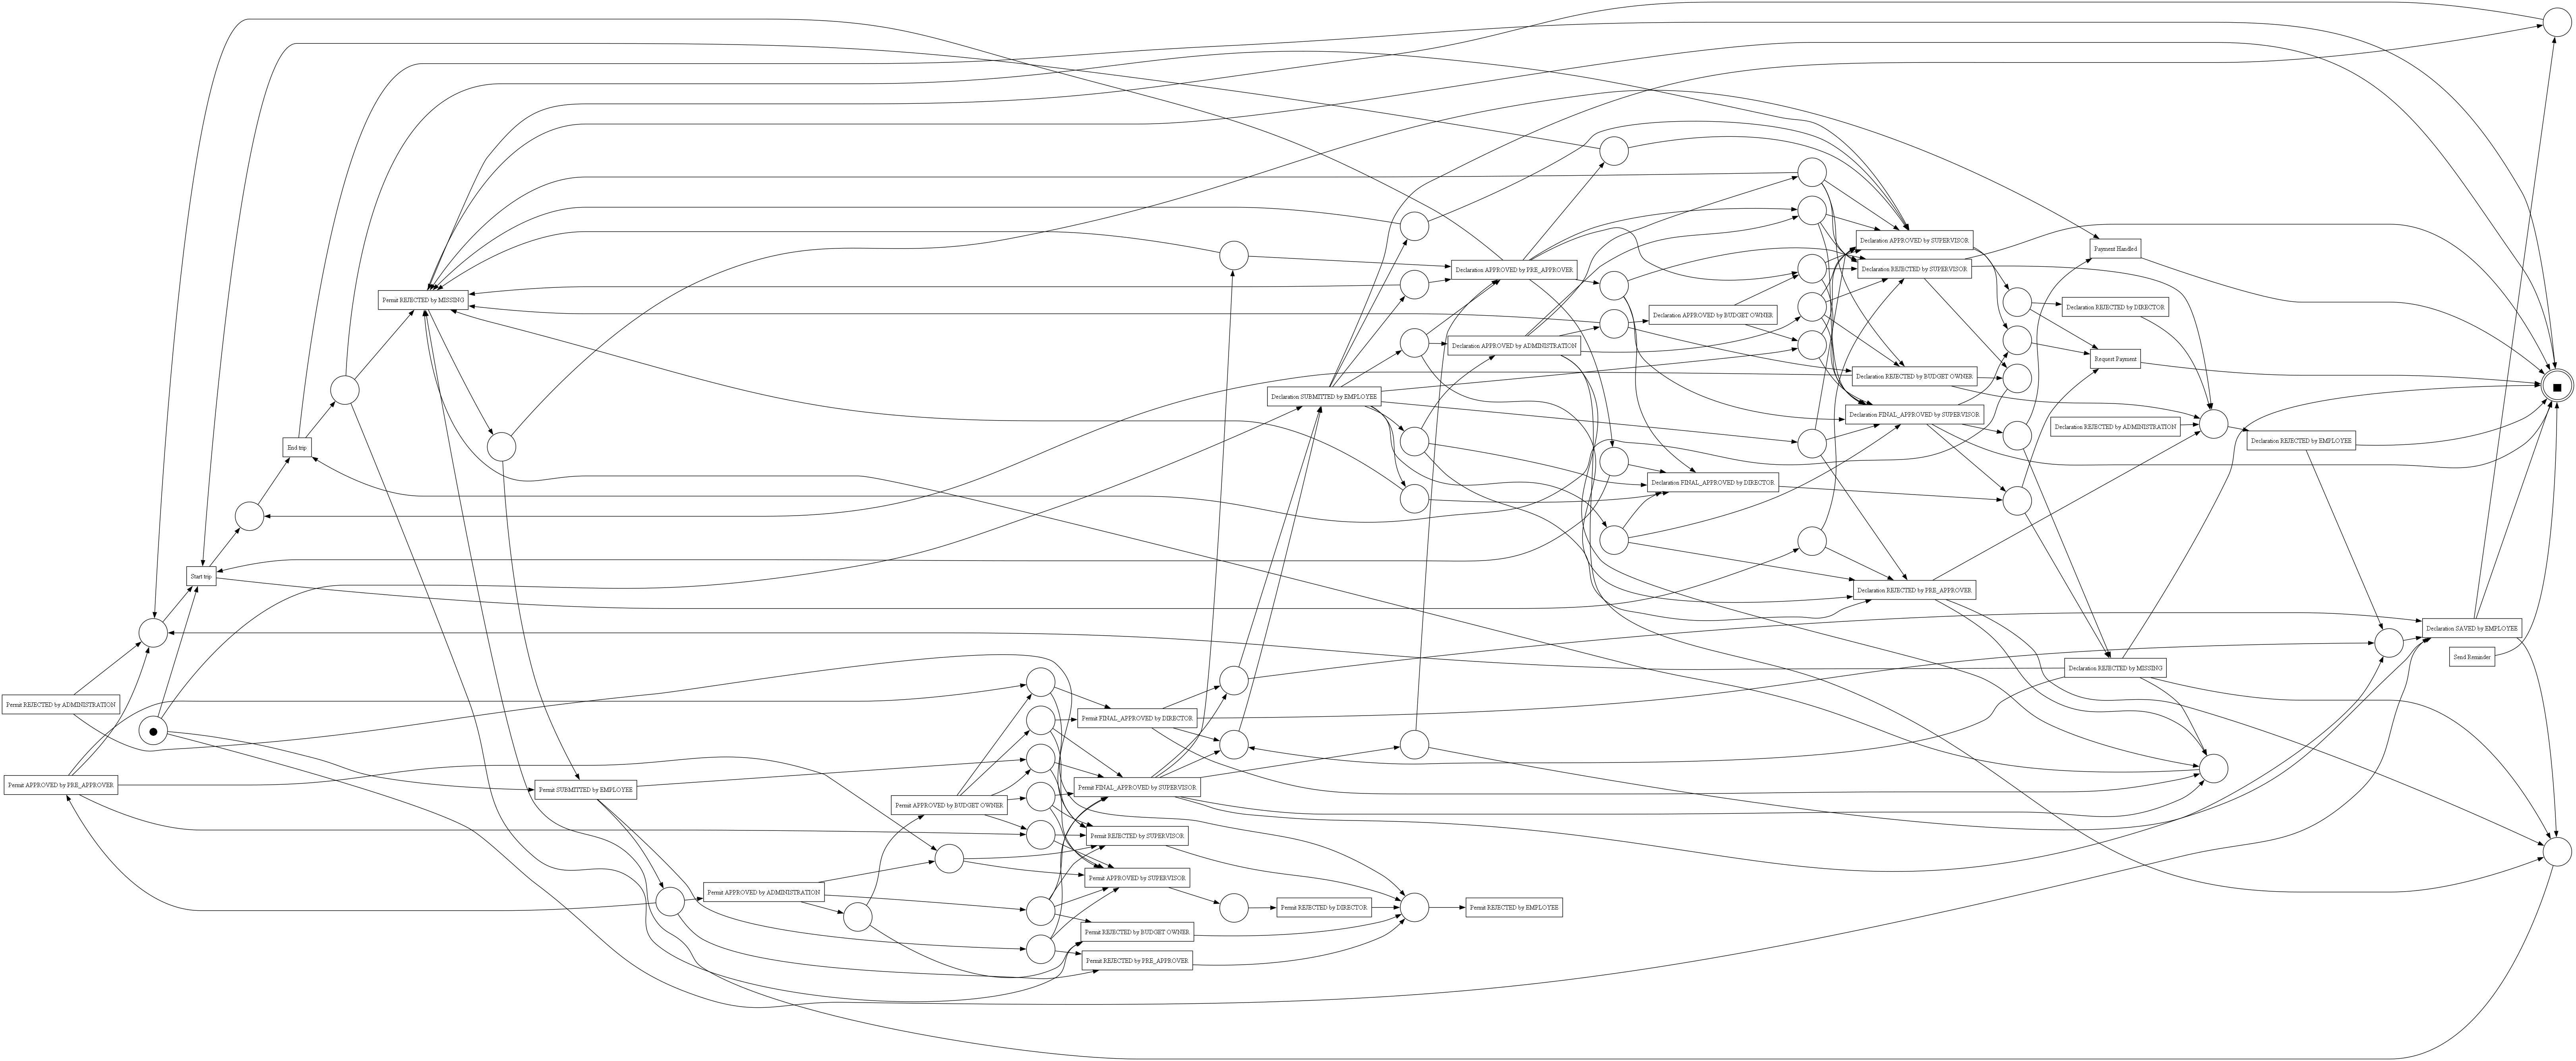

In [33]:
net, initial_marking, final_marking = alpha_miner.apply(log_international)

gviz_alphaminer_international = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz_alphaminer_international)

Das mithilfe des Alpha-Miner-Algorithmus erzeugte Petri-Netz ist deutlich zu unübersichtlich, um den zugrundeliegenden Prozess klar zu visualisieren. <br>
Es werden nachfolgend verschiedene Prozessvarianten betrachtet.

### Prozessvarianten

In [34]:
from pm4py.algo.filtering.log.variants import variants_filter

# Extrahiere die Varianten aus dem Log
variants_international = variants_filter.get_variants(log_international)

# Zeige die Varianten an
for variant_id, variant in variants_international.items():
    print(f"Variante: {variant_id}")
    print(f"Anzahl der Fälle: {len(variant)}")
    print("Aktivitäten-Sequenz:")
    for event in variant[0]:
        print(f" - {event['concept:name']} (Ressource: {event['org:resource']})")
    print("-" * 40)

Variante: ('Start trip', 'End trip', 'Permit SUBMITTED by EMPLOYEE', 'Permit FINAL_APPROVED by SUPERVISOR', 'Declaration SUBMITTED by EMPLOYEE', 'Declaration FINAL_APPROVED by SUPERVISOR', 'Request Payment', 'Payment Handled')
Anzahl der Fälle: 36
Aktivitäten-Sequenz:
 - Start trip (Ressource: STAFF MEMBER)
 - End trip (Ressource: STAFF MEMBER)
 - Permit SUBMITTED by EMPLOYEE (Ressource: STAFF MEMBER)
 - Permit FINAL_APPROVED by SUPERVISOR (Ressource: STAFF MEMBER)
 - Declaration SUBMITTED by EMPLOYEE (Ressource: STAFF MEMBER)
 - Declaration FINAL_APPROVED by SUPERVISOR (Ressource: STAFF MEMBER)
 - Request Payment (Ressource: SYSTEM)
 - Payment Handled (Ressource: SYSTEM)
----------------------------------------
Variante: ('Start trip', 'Permit SUBMITTED by EMPLOYEE', 'Permit APPROVED by SUPERVISOR', 'Permit FINAL_APPROVED by DIRECTOR', 'Declaration SUBMITTED by EMPLOYEE', 'Declaration APPROVED by PRE_APPROVER', 'Declaration FINAL_APPROVED by SUPERVISOR', 'Request Payment', 'Payment Ha

In [35]:
print(f'Es gibt im log_domestic insgesamt {len(variants_international)} verschiedene Varianten.')

Es gibt im log_domestic insgesamt 753 verschiedene Varianten.


**Erstellen des BPMN-Modells für das gesamte international Log**

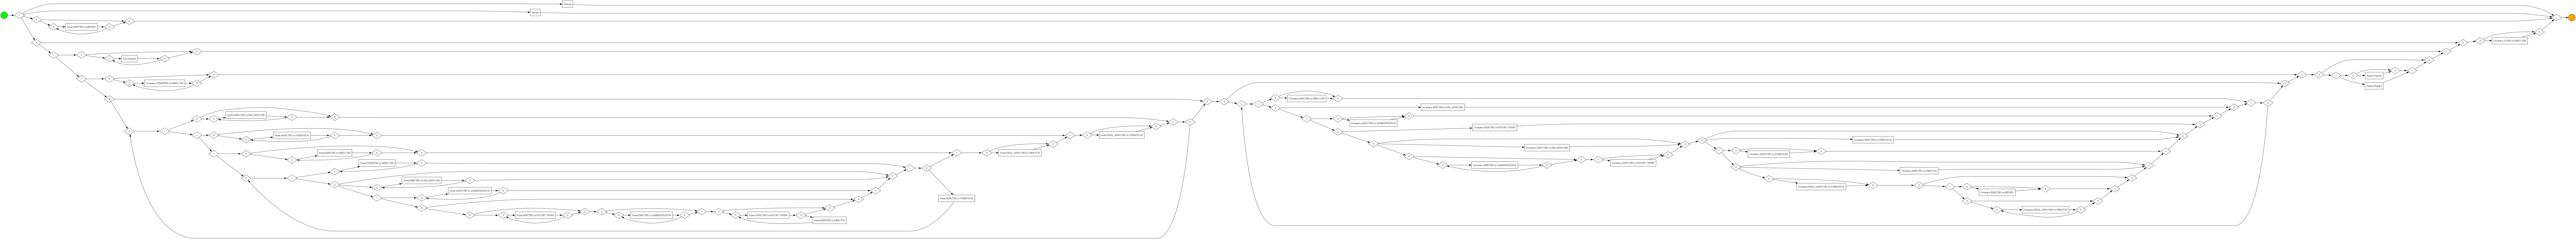

In [36]:
from pm4py.visualization.bpmn import visualizer as bpmn_vis

bpmn_model_international = pm4py.discover_bpmn_inductive(
    log_international,
    # noise_threshold = noise_threshold
)

gviz_bpmn_international = bpmn_vis.apply(bpmn_model_international)
bpmn_vis.view(gviz_bpmn_international)

Die vollständige mithilfe des Inductive-Miner-Algorithmus erstellte BPMN-Grafik ist übersichtlicher als die Visualisierung mithilfe des Alpha-Miner-Algorithmus. Um die Übersichtlichkeit weiter zu erhöhen, soll nachfolgend eine Einschränkung auf die häufigsten Varianten durchgeführt werden, um so ein geeignetes Abstraktionsniveau für die Beantwortung der Ausgangsfrage zu finden.

In [37]:
international_filter = VariantFilter(log_international, initial_percentage=58)

interactive(children=(IntSlider(value=58, description='percentage_nonanomaly_domestic'), Output()), _dom_class…

Für einen Filter auf einen kumulierten relativen Anteil von 58% ergeben sich insgesamt 13 Traces, für die jeder einzelne relative Anteil bei >1% liegt.

In [38]:
log_international_nonanomaly = variants_filter.apply(log_international, international_filter.filtered_variants)

In [39]:
pm4py.write_xes(log_international_nonanomaly, 'Data/nonanomaly_InternationalDeclarations.xes')

exporting log, completed traces ::   0%|          | 0/3781 [00:00<?, ?it/s]

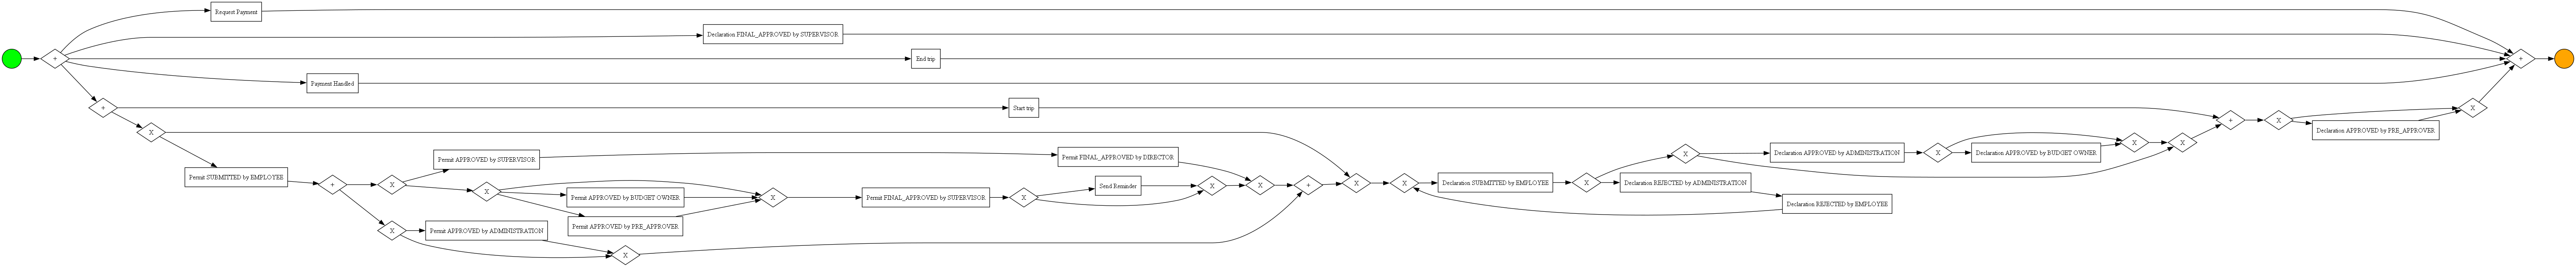

''

In [40]:
from pm4py.visualization.bpmn import visualizer as bpmn_vis

bpmn_model_international_nonanomaly = pm4py.discover_bpmn_inductive(
    log_international_nonanomaly,
    # noise_threshold = noise_threshold
)

gviz_bpmn_international_nonanomaly = bpmn_vis.apply(bpmn_model_international_nonanomaly)
bpmn_vis.view(gviz_bpmn_international_nonanomaly)

output_path = "./Data/gviz_bpmn_international_nonanomaly.svg"

bpmn_vis.save(gviz_bpmn_international_nonanomaly, output_path)

[Kehre zurück zum Hauptnotebook](../0_Hauptnotebook.ipynb)